Implementing Scaled Dot-Product Attention from Scarcth in PyTorch
====


 * Link to YouTube video on self-attention concept: [Self-Attention Using Scaled Dot-Product Approach](https://www.youtube.com/watch?v=1IKrHh2X0F0)
 * Link to YouTube video on this implementation: [link](#)

# Obtaining the feature sequence $X$

In [1]:
sentence = "Jane is going to the cinema to watch a new comedy"
token_ids = [0,  5,  4,   9,  7,    2,   9,  10, 1,  6,   3]

vocab = {
    'Jane': 0, 'a': 1, 'cinema': 2,
    'comedy': 3, 'going': 4, 'is': 5,
    'new': 6, 'the': 7, 'to': 9, 'watch': 10
}

In [2]:
import torch


# convert the list of token_ids to a tensor:
token_ids = torch.tensor(token_ids, dtype=torch.int64)

print(token_ids)

tensor([ 0,  5,  4,  9,  7,  2,  9, 10,  1,  6,  3])


In [3]:
torch.manual_seed(42)


vocab_size = 2000
d_model = 32

# setup an embedding layer, and compute the embedding features
embedding = torch.nn.Embedding(vocab_size, d_model)
X = embedding(token_ids)

print(X.shape)

torch.Size([11, 32])


### Step 0: Computing Q, K, V matrices

![Extracting QKV Matrices](images/vid05/ExtractingQKVSequence.png)

In [4]:
torch.manual_seed(42)

# compute the matrices: Q, K, and V

W_q = torch.randn(d_model, d_model)
W_k = torch.randn(d_model, d_model)
W_v = torch.randn(d_model, d_model)

Q = X.matmul(W_q)
K = X.matmul(W_k)
V = X.matmul(W_v)

print(f'Q: {Q.shape}')
print(f'K: {K.shape}')
print(f'V: {V.shape}')

Q: torch.Size([11, 32])
K: torch.Size([11, 32])
V: torch.Size([11, 32])


### Step 1: Dot-product between Q & K matrices

![Dot-product between Q & K matrices](images/vid05/DotProduct_QK.png)

In [5]:
# perform dot-product between Q & K
compat = Q.matmul(K.T)

print(compat.shape)

torch.Size([11, 11])


### Step 2: Scaling the compatibility matrix

![Scaling the compatibility matrix](images/vid05/ScalingStep.png)

In [6]:
import math

# scale the compatibility matrix:

scaled_compat = 1.0/math.sqrt(d_model) * compat

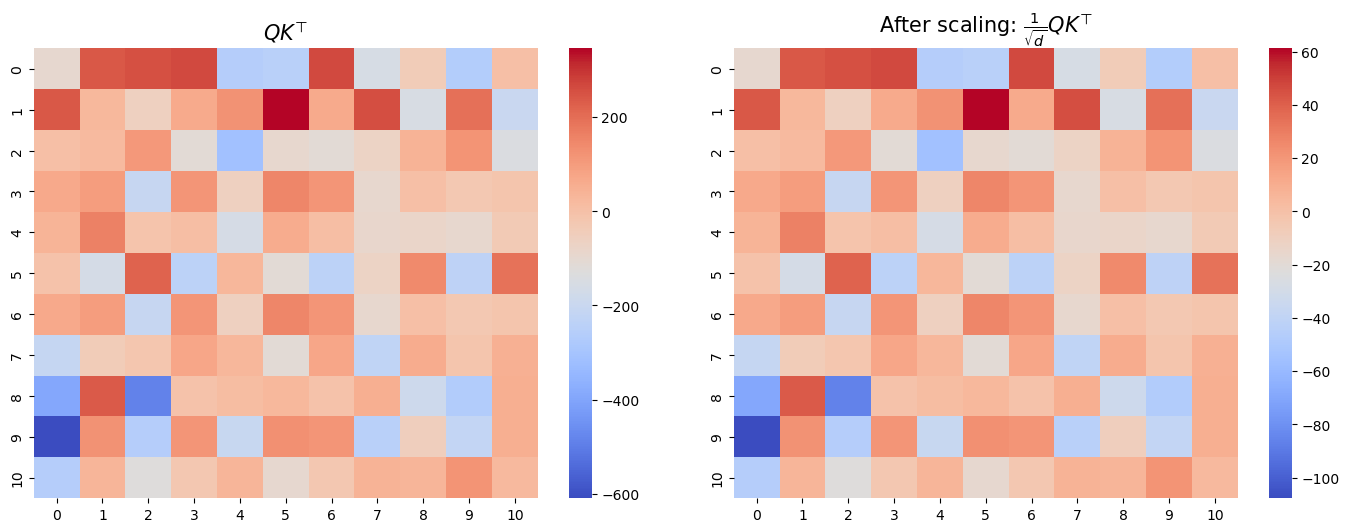

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# visualize the heatmaps before / after scaling
# using seaborn

fig = plt.figure(figsize=(14, 10))
ax = fig.add_axes((0.05, 0.05, 0.45, 0.45))
sns.heatmap(compat.detach().numpy(), cmap='coolwarm')
ax.set_title(r'$QK^\top$', size=15)
ax = fig.add_axes((0.55, 0.05, 0.45, 0.45))
sns.heatmap(scaled_compat.detach().numpy(), cmap='coolwarm')
ax.set_title(r'After scaling: $\frac{1}{\sqrt{d}}QK^\top$', size=15)
plt.show()

In [8]:
print(f'Variance of Q: {torch.var(Q).item():.2f}')
print(f'Variance of K: {torch.var(K).item():.2f}')
print(f'Variance of compatib. matrix (before scaling): {torch.var(compat).item():.2f}')
print(f'Variance of compatib. matrix (after scaling): {torch.var(scaled_compat).item():.2f}')

Variance of Q: 34.12
Variance of K: 26.70
Variance of compatib. matrix (before scaling): 25801.72
Variance of compatib. matrix (after scaling): 806.30


### Step 3: Apply Softmax

![Apply Softmax](images/vid05/SoftmaxStep.png)

In [10]:
attention = torch.softmax(scaled_compat, dim=0)

print(attention.shape)

torch.Size([11, 11])


### Step 4: Final output

![Final Step](images/vid05/FinalStep.png)

In [11]:
results = attention.matmul(V)
results.shape

torch.Size([11, 32])